# feature engineering

## Feature engineering is the process of selecting, extracting, transforming, and combining raw data into features that can be used to train a machine learning model. The goal of feature engineering is to create a set of informative features that can help a machine learning algorithm make accurate predictions or classifications

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/jogip/Downloads/test.csv.zip",usecols=[1,2,3,4,5,6,7])

In [3]:
data

,X0,X1,X2,X3,X4,X5,X6
0,az,v,n,f,d,t,a
1,t,b,ai,a,d,b,g
2,az,v,as,f,d,a,j
3,az,l,n,f,d,z,l
4,w,s,as,c,d,y,i
...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j
4205,t,aa,ai,d,d,aa,j
4206,y,v,as,f,d,aa,d
4207,ak,v,as,a,d,aa,c


In [4]:
data.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [5]:
data.shape

(4209, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
dtypes: object(7)
memory usage: 230.3+ KB


In [7]:
data.describe()

,X0,X1,X2,X3,X4,X5,X6
count,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12
top,ak,aa,as,c,d,v,g
freq,432,826,1658,1900,4203,246,1073


In [8]:
data.isnull()

,X0,X1,X2,X3,X4,X5,X6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4204,False,False,False,False,False,False,False
4205,False,False,False,False,False,False,False
4206,False,False,False,False,False,False,False
4207,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [10]:
for col in data.columns:
    print(col,': ',len(data[col].unique()),'labels')

X0 :  49 labels
X1 :  27 labels
X2 :  45 labels
X3 :  7 labels
X4 :  4 labels
X5 :  32 labels
X6 :  12 labels


## One hot encoding is a technique used in feature engineering to represent categorical variables as numerical features that machine learning algorithms can understand. In one hot encoding, each category in a categorical variable is represented as a binary feature.

For example, let's say we have a categorical variable "color" with three categories: red, blue, and green. To perform one hot encoding, we create three binary features: "red," "blue," and "green." If an observation is "red," then the "red" feature is set to 1 and the "blue" and "green" features are set to 0. If an observation is "blue," then the "blue" feature is set to 1 and the "red" and "green" features are set to 0, and so on.

One hot encoding allows machine learning algorithms to recognize the relationship between different categories without assuming any numerical relationship between them. This is important because categorical variables cannot be used directly in most machine learning algorithms that expect numerical input features.

In [11]:
pd.get_dummies(data,drop_first=True).shape

(4209, 169)

In [12]:
data.X2.value_counts().sort_values(ascending=False).head(20)

X2
as    1658
ae     478
ai     462
m      348
ak     260
r      155
n      113
s      100
f       85
e       84
ay      78
aq      72
a       44
b       38
k       25
t       25
ag      23
ac      20
ao      19
i       15
Name: count, dtype: int64

In [13]:
top_10=[x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]

In [14]:
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [15]:
import numpy as np

In [16]:
for label in top_10:
    data[label]=np.where(data['X2']==label,1,0)
data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,n,0,0,0,0,0,0,1,0,0,0
1,ai,0,0,1,0,0,0,0,0,0,0
2,as,1,0,0,0,0,0,0,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,as,1,0,0,0,0,0,0,0,0,0
5,ai,0,0,1,0,0,0,0,0,0,0
6,ae,0,1,0,0,0,0,0,0,0,0
7,ae,0,1,0,0,0,0,0,0,0,0
8,s,0,0,0,0,0,0,0,1,0,0
9,as,1,0,0,0,0,0,0,0,0,0


In [17]:
def one_hot_top_x(df,variable,top_x_values):
    for label in top_10:
     df[variable+ '_'+label]=np.where(df[variable]==label,1,0)
data=pd.read_csv("C:/Users/jogip/Downloads/test.csv.zip",usecols=[1,2,3,4,5,6,7])


In [18]:
one_hot_top_x(data,"X2",top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,az,v,n,f,d,t,a,0,0,0,0,0,0,1,0,0,0
1,t,b,ai,a,d,b,g,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,1,0,0,0,0,0,0,0,0,0
3,az,l,n,f,d,z,l,0,0,0,0,0,0,1,0,0,0
4,w,s,as,c,d,y,i,1,0,0,0,0,0,0,0,0,0


In [19]:
one_hot_top_x(data,"X1",top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,...,X1_as,X1_ae,X1_ai,X1_m,X1_ak,X1_r,X1_n,X1_s,X1_f,X1_e
0,az,v,n,f,d,t,a,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,l,n,f,d,z,l,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,w,s,as,c,d,y,i,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# handling the missing values in categorical data
## delete rows
## replace with the most frequent values
## apply classifier algorithm to predict

## apply unsuperised ML 

In [20]:
import pandas as pd

In [21]:
df=pd.read_csv("titanic_train.csv")

In [22]:
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [23]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [24]:
df.isnull()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
846,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
847,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
848,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False


In [25]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [26]:
df[df['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


In [27]:
df[df['cabin'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,709,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,16,NaN,"Co Longford, Ireland New York, NY",1
843,1288,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S,NaN,314.0,NaN,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [28]:
import numpy as np
df['cabin_null']=np.where(df['cabin'].isnull(),1,0)

In [29]:
df['cabin_null'].mean()

0.7752941176470588

In [30]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'cabin_null'],
      dtype='object')

In [31]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

# Missing at random

# mean /median/mode replacement
### Random sample imputation
### capturing NAN values with a new feature
### end of distribution imputation
### arbitary imputation
### frequent categories imputation


In [32]:
import pandas as pd

In [33]:
df=pd.read_csv("titanic_train.csv" ,usecols=['age','fare','survived'])

In [34]:
df

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0
...,...,...,...
845,55.0,50.0000,0
846,58.0,29.7000,0
847,24.0,26.0000,1
848,3.0,13.7750,0


In [35]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [36]:
# letsa see the percentage of missing values
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [37]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [38]:
median=df.age.median()

In [39]:
median

28.0

In [40]:
impute_nan(df,'age',median)
df.head()

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [41]:
df['age'].std()


14.562243434125556

In [42]:
df['age_median'].std()

12.999022882894202

In [43]:
import matplotlib.pyplot as plt

In [44]:
%matplotlib inline

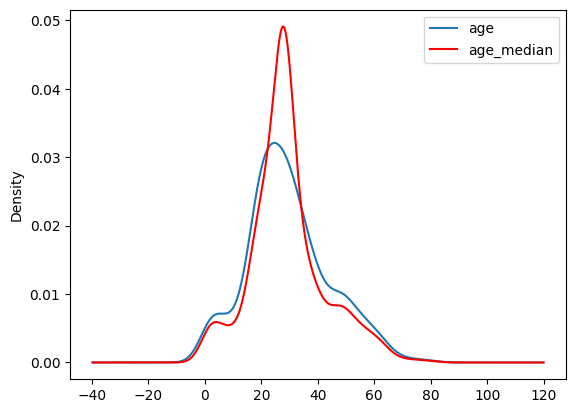

In [45]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Advantages and disadvantages of mean /median  imputations
## advantages
1.easy to implement(robust to outliers)
2.faster way to obtain the complete dataset
### disadvantages
1.change or distortions in the original variance
2.impact correlation

In [46]:
# random sample imputation
## Aim: Random sample imputation consists of taking randomobservations from the data set and
        ###we use the data set and we use this observations to replacfe  the nan values


In [47]:
import pandas as pd

In [48]:
df=pd.read_csv("titanic_train.csv" ,usecols=['age','fare','survived'])

In [49]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [50]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [51]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [52]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [53]:
median=df.age.median()

In [54]:
median

28.0

In [55]:
impute_nan(df,'age',median)

In [56]:
df.head()

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


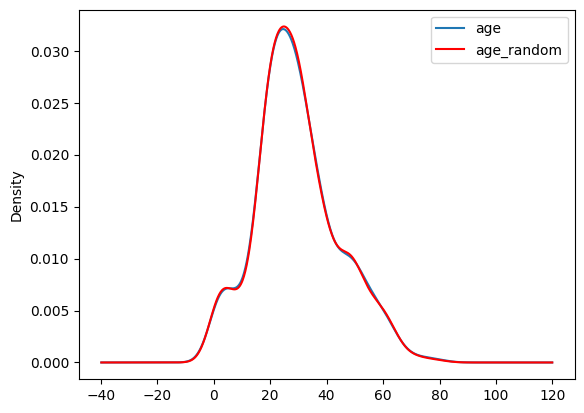

In [57]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_random.plot(kind='kde', ax=ax, color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# advantages
easy t0 implement
there is less distortion in variance

## disadvantages
every situation randomness will not work

# capturing NAN values with a new feature

In [58]:
df=pd.read_csv("titanic_train.csv" ,usecols=['age','fare','survived'])

In [59]:
df

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0
...,...,...,...
845,55.0,50.0000,0
846,58.0,29.7000,0
847,24.0,26.0000,1
848,3.0,13.7750,0


In [60]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [61]:
df['age_nan']=np.where(df['age'].isnull(),1,0)

In [62]:
df.head()

,age,fare,survived,age_nan
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


In [63]:
df['age'].fillna(df.age.median() , inplace=True)
df.head(5)

,age,fare,survived,age_nan
0,28.0,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


# advantages
1.easy to implement
2.it capturtes the importance of missing values
# disadvantage
1.This basicalli creating additional feature , this may leads to curse dimensionality


In [64]:
df=pd.read_csv("titanic_train.csv" ,usecols=['age','fare','survived'])

In [65]:
df

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0
...,...,...,...
845,55.0,50.0000,0
846,58.0,29.7000,0
847,24.0,26.0000,1
848,3.0,13.7750,0


In [66]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<Axes: >

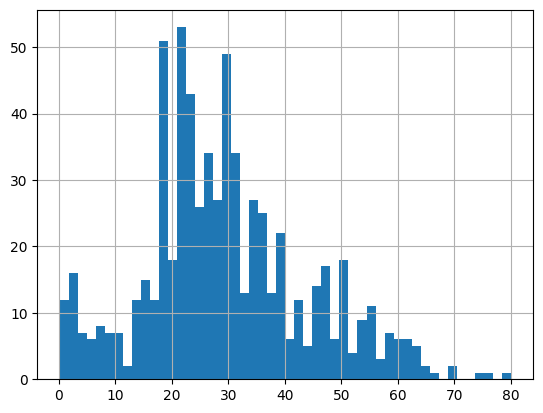

In [68]:
df.age.hist(bins=50)

In [76]:
extreme=df.age.mean()+3*df.age.std()

In [71]:
import seaborn as sns

<Axes: xlabel='age'>

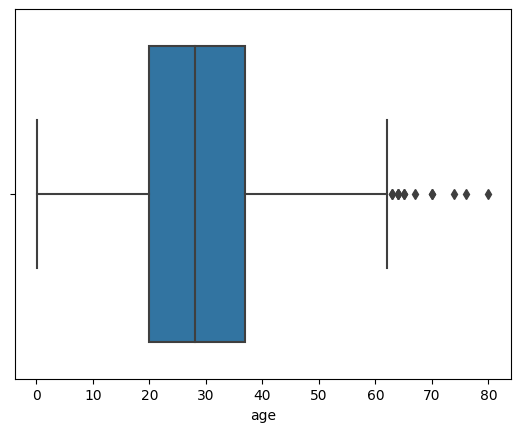

In [75]:
sns.boxplot(df, x="age")

In [79]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [80]:
impute_nan(df,"age",df.age.median(),extreme)

In [82]:
df.head(10)

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000
5,28.0,22.5250,0,28.000000
6,19.0,0.0000,0,19.000000
7,30.0,13.0000,1,30.000000
8,22.0,7.7750,1,22.000000
9,21.0,9.8250,0,21.000000


<Axes: >

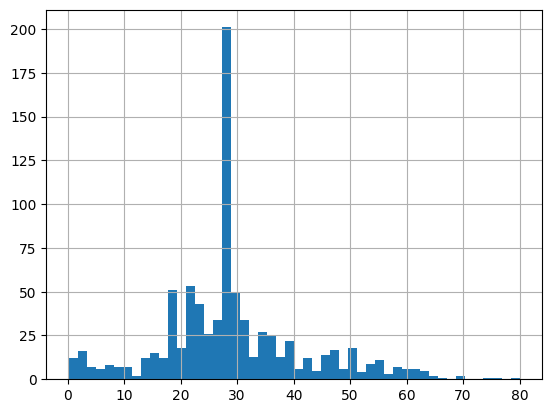

In [83]:
df['age'].hist(bins=50)

<Axes: >

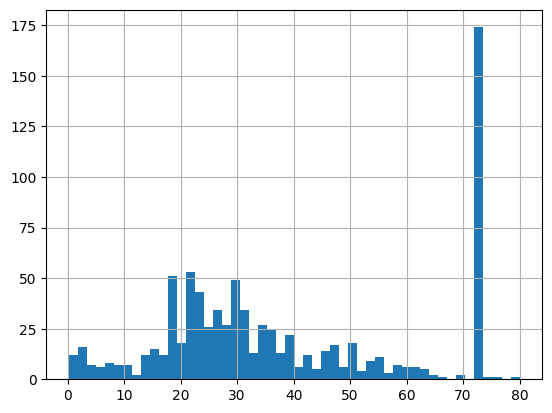

In [84]:
df['age_end_distribution'].hist(bins=50)

<Axes: xlabel='age'>

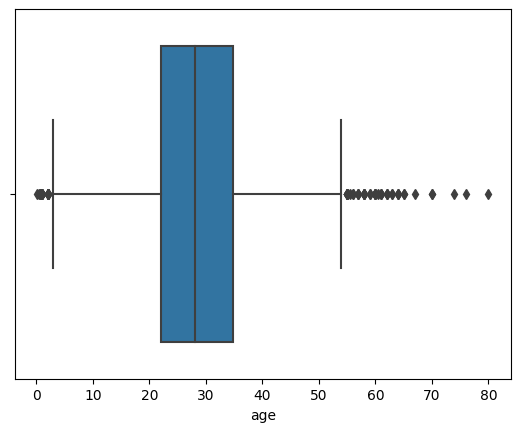

In [87]:
sns.boxplot(x="age",data=df)

<Axes: xlabel='age_end_distribution'>

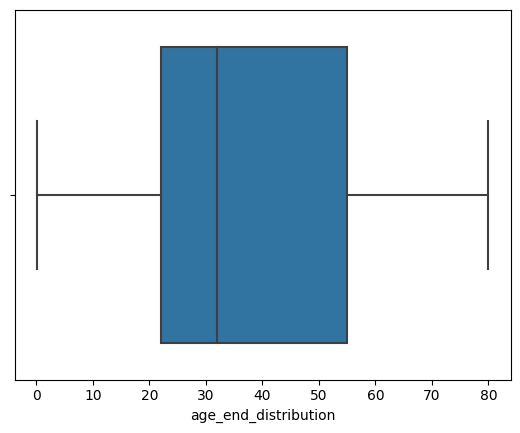

In [89]:
sns.boxplot(x="age_end_distribution",data=df)

# advantages 
#### 1.easy to implement
##### 2.captures the importance of missing if there is one
# disadvantages
#### 1.Distorts the original distribution of the variable
##### If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
##### Hard to decide which value to use